In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
%%time
mises = pd.read_csv('mises.csv').values
peeq = pd.read_csv('peeq.csv').values
triax = pd.read_csv('triax.csv').values
lode = pd.read_csv('lode.csv').values
volume = pd.read_csv('volume.csv').values

Wall time: 2 s


In [4]:
# DIL

c1 = 0.4
c2 = 1
c3 = 0.1
c4 = 1.5
c5 = 0.4
c6 = 1

data_pnts = 100


# prepare x-point and y-point to put in equation

df_x = pd.DataFrame(np.zeros((data_pnts, data_pnts)))
for i in range(data_pnts):
    df_x.iloc[i,:] = np.arange(0, 1, 1/data_pnts)                      # row by rows
    
df_y = pd.DataFrame(np.zeros((data_pnts, data_pnts)))
for i in range(data_pnts):
    df_y.iloc[:,i] = np.arange(0, 1, 1/data_pnts)                      # column by columns


# construct DIL
df_DIL = ( c1*np.exp(-c2*df_x) - c3*np.exp(-c4*df_x) )*df_y + c3*np.exp(-c4*df_x)

**Calculate global variables**

In [5]:
globalvolume = volume.sum(axis=1)
globalTriax = np.sum(triax * volume, axis=1)/globalvolume
globalLode = np.sum(lode * volume, axis=1)/globalvolume
globalPeeq = np.sum(peeq * volume, axis=1)/globalvolume

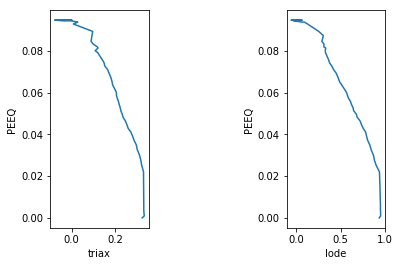

In [6]:
plt.subplot(1,3,1)
plt.plot(globalTriax, globalPeeq)
plt.xlabel('triax')
plt.ylabel('PEEQ')

plt.subplot(1,3,3)
plt.plot(globalLode, globalPeeq)
plt.xlabel('lode')
plt.ylabel('PEEQ')

plt.show()

In [7]:
globalVar = np.c_[globalTriax, globalLode, globalPeeq]
np.savetxt('globalVar.csv', globalVar, delimiter=',')

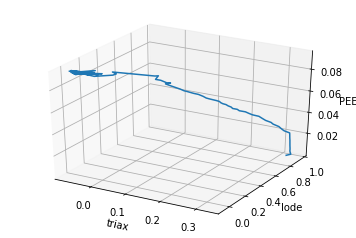

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot global scatter result    
xs = globalTriax
ys = globalLode
zs = globalPeeq
ax.plot(xs, ys, zs)
   
# set axis label
ax.set_xlabel('triax')
ax.set_ylabel('lode')
ax.set_zlabel('PEEQ')

plt.show()

**Calculate local variables**

In [9]:
localElems = np.loadtxt('localElems.csv').tolist()
localElems = [int(e) for e in localElems]

In [10]:
localvolume = volume[:, localElems].sum(axis=1)
localTriax = np.sum(triax[:, localElems] * volume[:, localElems], axis=1)/localvolume
localLode = np.sum(lode[:, localElems] * volume[:, localElems], axis=1)/localvolume
localPeeq = np.sum(peeq[:, localElems] * volume[:, localElems], axis=1)/localvolume

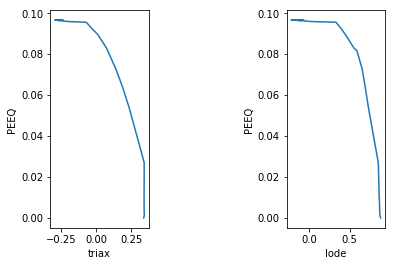

In [11]:
plt.subplot(1,3,1)
plt.plot(localTriax, localPeeq)
plt.xlabel('triax')
plt.ylabel('PEEQ')

plt.subplot(1,3,3)
plt.plot(localLode, localPeeq)
plt.xlabel('lode')
plt.ylabel('PEEQ')

plt.show()

In [12]:
localVar = np.c_[localTriax, localLode, globalPeeq]
np.savetxt('localVar.csv', localVar, delimiter=',')

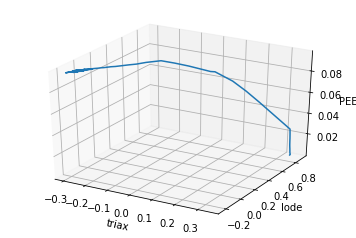

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot local scatter result    
xs = localTriax
ys = localLode
zs = localPeeq
ax.plot(xs, ys, zs)
   
# set axis label
ax.set_xlabel('triax')
ax.set_ylabel('lode')
ax.set_zlabel('PEEQ')

plt.show()

**Graph to compare all**

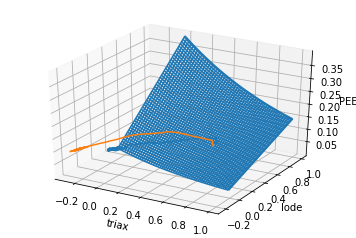

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# plot global scatter result    
xs = globalTriax
ys = globalLode
zs = globalPeeq
globalPlot = ax.plot(xs, ys, zs)
# globalPlot.set_label('global')
   
# plot local scatter result    
xs = localTriax
ys = localLode
zs = localPeeq
localPlot = ax.plot(xs, ys, zs)
# localPlot.set_label('local')
   
# plot DIL
X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = df_DIL
DILPlot = ax.plot_wireframe(X, Y, Z)


# set axis label
ax.set_xlabel('triax')
ax.set_ylabel('lode')
ax.set_zlabel('PEEQ')
# show legend
# ax.legend()

plt.show()